In [65]:
import glob,os,sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
import re
import scipy.stats as st
from os.path import expanduser
import cmath
import scipy.optimize as op
import time
import gzip
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import (mark_inset,inset_axes,InsetPosition)
%matplotlib inline




In [66]:
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Times New Roman"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "serif"

start = time.time()

home = os.path.expanduser("~")

direc = os.listdir(".")



In [67]:
def empty(df):
    return len(df.index) == 0
    
def fwhm(valuelist, peakpos,base):
    peakvalue = valuelist[peakpos]-base
    phalf = (peakvalue / 2.0)+base

    # go left and right, starting from peakpos
    ind1 = peakpos
    ind2 = peakpos   

    while ind1>2 and valuelist[ind1]>phalf:
        ind1=ind1-1
    while ind2<len(valuelist)-1 and valuelist[ind2]>phalf:
        ind2=ind2+1  
    return ind1,ind2

def tE_finder (t,f,f_s):
    df = pd.DataFrame({'t' : t, 'f' : f})
    
    A_base = (float(f_s)*0.34)+1
    
    t_max = df['t'][df['f'].argmax()]
    t_right = df['t'][df['t']>t_max]
    t_left = df['t'][df['t']<t_max]
    
    if empty(t_right) == 'False':
        tE_right = np.abs(t_right[(np.abs(df['f'][df['t']>t_max]-(A_base))).argmin()]-t_max)
    else:
        tE_right = 1
    if empty(t_left) == 'False':
        tE_left = np.abs(t_left[(np.abs(df['f'][df['t']<t_max]-(A_base))).argmin()]-t_max)
    else:
        tE_left = 1
    
    return min([tE_right,tE_left])

def fun (t0,u0,tE,f_s):
    u = np.sqrt(u0**2+((df['t']-t0)/tE)**2)
    A = ((u**2)+2)/(u*np.sqrt(u**2+4))
    return (f_s * (A-1)) +1
        
def fun2 (mean, sigma,amp, t0,u0,tE,f_s):
    u = np.sqrt(u0**2+((df['t']-t0)/tE)**2)
    A = (((amp/np.sqrt(2*pi*(sigma**2)))*np.exp(-((df['t']-mean)**2)/(2*(sigma**2)))))+((u**2)+2)/(u*np.sqrt((u**2)+4))
    return (f_s * (A-1)) +1

def lnlike(theta, t, f, f_err):
    t0, u0, tE,f_s = theta
    model = fun(t0, u0, tE,f_s)
    inv_sigma2 = 1.0/(f_err**2)
    return -0.5*(np.sum((f-model)**2*inv_sigma2))

def lnlike2(theta, t, f, f_err):
    mean, sigma,amp, t0,u0,tE,f_s = theta
    model = fun2(mean, sigma,amp, t0,u0,tE,f_s)
    inv_sigma2 = 1.0/(f_err**2)
    return -0.5*(np.sum((f-model)**2*inv_sigma2))


In [57]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [58]:
cd ./../../../../KMTNET/

[Errno 2] No such file or directory: './../../../../KMTNET/'
/Users/somayeh/KMTNET/KB160001


In [59]:
cd KB160001

[Errno 2] No such file or directory: 'KB160001'
/Users/somayeh/KMTNET/KB160001


In [60]:
ls


KMTA02_I.pysis  KMTC02_I.pysis  KMTS02_I.pysis  pysis.tar.gz


In [61]:
x = np.loadtxt('KMTA02_I.pysis')
x1 = np.loadtxt('KMTC02_I.pysis')
x2 = np.loadtxt('KMTS02_I.pysis')

In [62]:
df = pd.DataFrame({'t': x[:,0], 'm':x[:,1], 'm_err': x[:,2]})
df1 = pd.DataFrame({'t': x1[:,0], 'm':x1[:,1], 'm_err': x1[:,2]})
df2 = pd.DataFrame({'t': x2[:,0], 'm':x2[:,1], 'm_err': x2[:,2]})

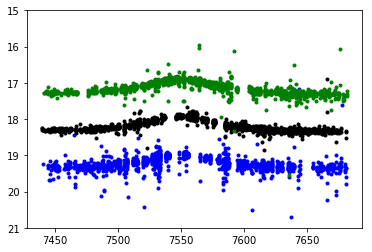

In [63]:
plt.plot(df['t'],df['m']+0.8,'b.')
plt.plot(df1['t'],df1['m'],'k.')
plt.plot(df2['t'],df2['m']-0.8,'g.')
plt.ylim(15,21)


plt.gca().invert_yaxis()



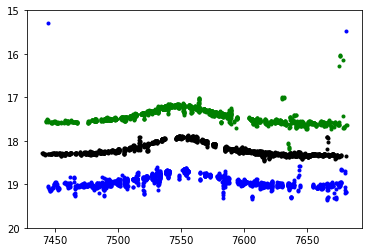

In [64]:
plt.plot(df['t'],smooth(df['m'],5)+0.5,'b.')
plt.plot(df1['t'],smooth(df1['m'],5),'k.')
plt.plot(df2['t'],smooth(df2['m'],5)-0.5,'g.')
plt.ylim(15,20)
plt.gca().invert_yaxis()



In [27]:
pwd

u'/Users/somayeh/KMTNET/KB160001'